In [ ]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(imagens_treinamento, labels_treinamento),(imagens_teste, labels_teste) = datasets.cifar10.load_data()
imagens_teste = imagens_teste/255
imagens_treinamento = imagens_treinamento/255

170508288/170498071 [==============================] - 13s 0us/step


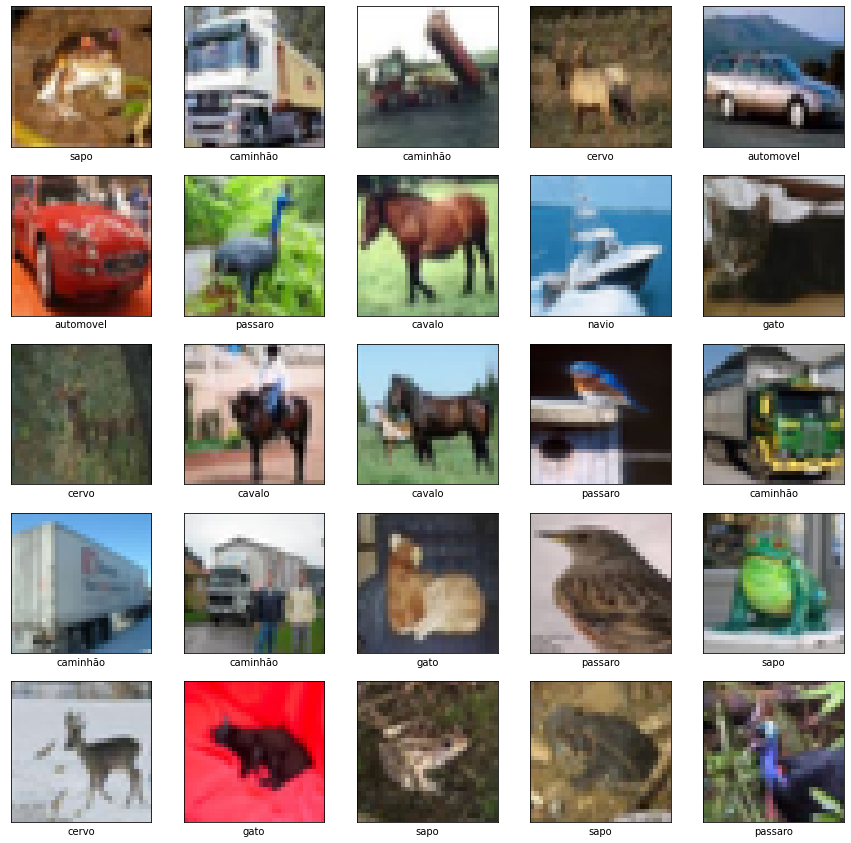

In [ ]:
nome_classes = ['avião', 'automovel', 'passaro', 'gato', 'cervo', 'cachorro', 'sapo', 'cavalo', 'navio', 'caminhão']
plt.figure(figsize=(15,15))
for i in range(25):
   plt.subplot(5,5,i+1)
   plt.grid(False)
   plt.xticks([])
   plt.yticks([])
   plt.imshow(imagens_treinamento[i])
   plt.xlabel(nome_classes[labels_treinamento[i][0]])
plt.show()

In [ ]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(32,(3,3), activation= 'relu', input_shape = (32,32,3)))
cnn.add(layers.MaxPool2D((2,2)))
cnn.add(layers.Conv2D(64,(3,3), activation= 'relu'))
cnn.add(layers.MaxPool2D((2,2)))
cnn.add(layers.Conv2D(64,(3,3), activation= 'relu'))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(128, activation= 'relu'))
cnn.add(layers.Dense(10))

In [ ]:
cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 1024)             

In [ ]:
cnn.compile(optimizer= 'Adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
historia = cnn.fit(imagens_treinamento, labels_treinamento, epochs= 10, validation_data=(imagens_teste, labels_teste))

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4706 - accuracy: 0.4652 - val_loss: 1.2071 - val_accuracy: 0.5636
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0925 - accuracy: 0.6146 - val_loss: 1.0059 - val_accuracy: 0.6501
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9391 - accuracy: 0.6720 - val_loss: 0.9792 - val_accuracy: 0.6582
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8374 - accuracy: 0.7060 - val_loss: 0.8889 - val_accuracy: 0.6915
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7578 - accuracy: 0.7343 - val_loss: 0.8888 - val_accuracy: 0.6994
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6955 - accuracy: 0.7561 - val_loss: 0.8353 - val_accuracy: 0.7141
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6373 - accuracy: 0.7747 - val_loss: 0.8585 - val_accuracy: